In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)


In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train.shape

(60000, 28, 28)

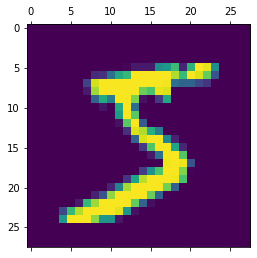

In [5]:
plt.matshow(x_train[0])

In [6]:
y_train[0]

5

In [7]:
x_train = x_train/255
x_test = x_test /255

# ann for classification

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # INput lapers
    keras.layers.Dense(100,activation='relu'), # One hidden layer with 100 nodes
    keras.layers.Dense(10,activation="softmax") # Output layer softmax
])

In [9]:
model.summary() #

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2766 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1249 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0874 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0665 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0526 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0425 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0276 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0231 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.020

In [13]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 657us/step - loss: 0.0992 - accuracy: 0.9719


[0.09917444735765457, 0.9718999862670898]

In [14]:
x_train=x_train.reshape(-1,28,28,1) #-1  rowsconerting in to columns flatten
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test=x_test.reshape(-1,28,28,1) #-1 rows conerting in to columns flatten
x_test.shape

(10000, 28, 28, 1)

# cnn for classification

In [16]:
model=keras.Sequential([
    layers.Conv2D(30,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')       #filters and filter size (30,(3,3)) filter size and filter stride(2,2)
])

In [17]:
model.summary() #28-3+1 = 26

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 30)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5070)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               507100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
________________________________________________

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train,epochs=5) #1875*35 = 60000

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1635 - accuracy: 0.9516
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0560 - accuracy: 0.9825
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0376 - accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0253 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0180 - accuracy: 0.9941


In [21]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
model.evaluate(x_test,y_test)  #1000/32 = 313

313/313 [==============================] - 1s 2ms/step - loss: 0.0463 - accuracy: 0.9857


[0.046297587454319, 0.9857000112533569]